In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
position_changes_df = pd.read_csv("position_changes.csv")
position_changes_df.drop(columns=["Unnamed: 0"], inplace=True)
position_changes_df["time"] = pd.to_datetime(position_changes_df["timestamp"], unit='s')
position_changes_df["exchanged_position_notional"] = -position_changes_df["exchanged_position_notional"]
position_changes_df

,id,tx_hash,trader,base_token,exchanged_position_size,exchanged_position_notional,fee,open_notional,realized_pnl,position_size_after,swapped_price,entry_price_after,market_price_after,from_function_signature,block_number_log_index,block_number,timestamp,time
0,0x0bc364e9f5a99c87cfb5c1f4a6ef2b9784e872092805...,0x0bc364e9f5a99c87cfb5c1f4a6ef2b9784e872092805...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.055019,2997.000000,3.000000,-15000.000000,0.000000,0.275492,54472.154115,54448.103193,54491.778871,0xb6b1b6c3,515608004,515608,1638001140,2021-11-27 08:19:00
1,0x0ccfa4751250a5374b5d28823a1011987b833f71a1ce...,0x0ccfa4751250a5374b5d28823a1011987b833f71a1ce...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.055098,2997.000000,3.000000,-9000.000000,0.000000,0.165414,54393.697496,54408.885139,54413.308117,0xb6b1b6c3,515587004,515587,1638001140,2021-11-27 08:19:00
2,0x0e085ae4b7c345ee6de6d67f16c8c127a694d1c9f27f...,0x0e085ae4b7c345ee6de6d67f16c8c127a694d1c9f27f...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.729828,2997.000000,3.000000,-3000.000000,0.000000,0.729828,4106.445744,4110.556300,4108.035203,0xb6b1b6c3,515571005,515571,1638001140,2021-11-27 08:19:00
3,0x47357bec5ee7101b57f457be5135c91a9c7133cc82bb...,0x47357bec5ee7101b57f457be5135c91a9c7133cc82bb...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.728137,2997.000000,3.000000,-12000.000000,0.000000,2.915928,4115.986193,4115.327606,4117.577498,0xb6b1b6c3,515594004,515594,1638001140,2021-11-27 08:19:00
4,0x548dd8a96b9faa92066283339832e380fd506f4ebc94...,0x548dd8a96b9faa92066283339832e380fd506f4ebc94...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.729264,2997.000000,3.000000,-6000.000000,0.000000,1.459092,4109.624663,4112.146735,4111.214738,0xb6b1b6c3,515584004,515584,1638001140,2021-11-27 08:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834858,0xd91c7e2a87ab9380062386239788915e4f1c5a052fc8...,0xd91c7e2a87ab9380062386239788915e4f1c5a052fc8...,0xbca93564bbf750e7b81ee1506009c7d86c6a4a45,0xb24f50dd9918934ab2228be7a097411ca28f6c14,-32.999902,-3023.793838,3.023794,-14962.556823,-9.172361,162.961152,91.630389,91.816710,91.582076,0xb6b1b6c3,6651587008,6651587,1651138134,2022-04-28 09:28:54
1834859,0x1ec3f79f957587b332572447f288b15ad1196a7e760a...,0x1ec3f79f957587b332572447f288b15ad1196a7e760a...,0x6f2ddd6d04aa4ebaa6e9529e8a1b4062a2716281,0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2,128.952896,2594.732513,2.597330,8420.360981,-0.556983,-418.145904,20.121553,20.137375,20.132960,0xb6b1b6c3,6651597008,6651597,1651138149,2022-04-28 09:29:09
1834860,0x5d9e91d0e0f32cfd68a39c001e3c1a3a77f7d629b48c...,0x5d9e91d0e0f32cfd68a39c001e3c1a3a77f7d629b48c...,0x4b4f526b450c75f3cb0e9aa0a0b5480e4b0c478a,0x151bb01c79f4516c233948d69dae39869bccb737,-25.872016,-2596.910612,2.596911,7150.315804,0.000000,-71.290018,100.375270,100.298977,100.362358,0xb6b1b6c3,6651599007,6651599,1651138149,2022-04-28 09:29:09
1834861,0x978645e43b1779dae628ed4df8a0350803d161c8fef1...,0x978645e43b1779dae628ed4df8a0350803d161c8fef1...,0xd8bcd1e2f0e96a3402fd678b0b2eaceb80e1c226,0xbe5de48197fc974600929196239e264ecb703ee8,3371.136364,4297.643387,0.000000,85634.249350,-31.434297,-67667.741060,1.274835,1.265511,1.273833,0xcde109b6,6651595007,6651595,1651138149,2022-04-28 09:29:09


In [3]:
tokens_addresses_to_names_dict = {
    "0x86f1e0420c26a858fc203a3645dd1a36868f18e5": "vBTC",
    "0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb": "vETH",
    "0x5faa136fc58b6136ffdaeaac320076c4865c070f": "vAVAX",
    "0xb24f50dd9918934ab2228be7a097411ca28f6c14": "vLUNA",
    "0x151bb01c79f4516c233948d69dae39869bccb737": "vSOL",
    "0x7161c3416e08abaa5cd38e68d9a28e43a694e037": "vCRV",
    "0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8": "vSAND",
    "0x2f198182ec54469195a4a06262a9431a42462373": "vLINK",
    "0x5f714b5347f0b5de9f9598e39840e176ce889b9c": "vATOM",
    "0x77d0cc9568605bfff32f918c8ffaa53f72901416": "vONE",
    "0x3fb3282e3ba34a0bff94845f1800eb93cc6850d4": "vNEAR",
    "0x2db8d2db86ca3a4c7040e778244451776570359b": "vFTM",
    "0x7eada83e15acd08d22ad85a1dce92e5a257acb92": "vFLOW",
    "0xb6599bd362120dc70d48409b8a08888807050700": "vBNB",
    "0x9482aafdced6b899626f465e1fa0cf1b1418d797": "vPERP",
    "0xbe5de48197fc974600929196239e264ecb703ee8": "vMATIC",
    "0x34235c8489b06482a99bb7fcab6d7c467b92d248": "vAAVE",
    "0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2": "vAPE"
}

position_changes_df["pool_name"] = position_changes_df["base_token"].replace(tokens_addresses_to_names_dict)
position_changes_df["day_of_year"] = position_changes_df["time"].dt.dayofyear

In [5]:
len(position_changes_df["trader"].unique())

11443

In [6]:
position_changes_df.columns

Index(['id', 'tx_hash', 'trader', 'base_token', 'exchanged_position_size',
       'exchanged_position_notional', 'fee', 'open_notional', 'realized_pnl',
       'position_size_after', 'swapped_price', 'entry_price_after',
       'market_price_after', 'from_function_signature',
       'block_number_log_index', 'block_number', 'timestamp', 'time',
       'pool_name', 'day_of_year'],
      dtype='object')

# Sum per trader

In [85]:
grouping_columns = ["trader", "exchanged_position_notional", "fee", "realized_pnl"]

trader_position_changes_df = position_changes_df[grouping_columns].groupby("trader").sum()
trader_position_changes_df.sort_values("realized_pnl")

,exchanged_position_notional,fee,realized_pnl
trader,,,
0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,1.022437e+06,1.153764e+06,-3.387945e+06
0xf8489bcef22d3282bb884b9e9cc708bb465c075e,9.777031e+05,4.581778e+05,-1.466126e+06
0x9455b22685036d89874296460fb28de8a70a6a66,-2.286485e+06,2.276409e+03,-6.883971e+05
0x70332de459d5554a9a310a7c4f7c6069c73604f9,-4.710145e+05,1.535136e+05,-6.542422e+05
0x4cd804c696f54c419b75fc241a17c512bfb13df4,4.411805e+05,1.534644e+05,-6.213989e+05
...,...,...,...
0x36209cad56c31332d575bed3e989c988c2ad8eee,-3.319547e+05,4.248644e+04,1.602574e+05
0x57944fba39b44189f7173e70cf9ed99f2395283a,-6.111826e+05,2.063380e+05,1.890892e+05
0x6541e4d0f50a82544401b1e0721626415a37de99,-7.836516e+05,1.357527e+05,1.956091e+05


Considering that in some cases sum of exchanged position notional is equal to 0 it shows possibility of performed position closes. To check it grouping by trader and pool is required

## Fee hist

In [84]:
position_changes_df[(position_changes_df["open_notional"] > 0) &
                    (position_changes_df["trader"] == "0x9c1e0c67aa30c063f341885b12cb81cc94613fc7") &
                    (position_changes_df["pool_name"] == "vBTC")].head(10)

,id,tx_hash,trader,base_token,exchanged_position_size,exchanged_position_notional,fee,open_notional,realized_pnl,position_size_after,swapped_price,entry_price_after,market_price_after,from_function_signature,block_number_log_index,block_number,timestamp,time,pool_name,day_of_year
770,0x13feaf77eb625a4c8be8b1cc8f0fb40be1cad1af28f4...,0x13feaf77eb625a4c8be8b1cc8f0fb40be1cad1af28f4...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,-0.055202,-3003.003003,3.003003,5189.138068,0.000000,-0.095456,54400.448987,54361.526514,54382.085139,0xb6b1b6c3,539704004,539704,1638066113,2021-11-28 02:21:53,vBTC,332
773,0x8178053edb1f191e405cacd41ddff145c95ee75456c1...,0x8178053edb1f191e405cacd41ddff145c95ee75456c1...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,-0.055165,-3003.003003,3.003003,2189.138068,-8.547710,-0.040254,54437.189084,54382.751895,54418.819035,0xb6b1b6c3,539653005,539653,1638066113,2021-11-28 02:21:53,vBTC,332
776,0x5da4b51f4be995ad458aaf9c1c70b14f370f645d4eb4...,0x5da4b51f4be995ad458aaf9c1c70b14f370f645d4eb4...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,-0.055239,-3003.003003,3.003003,8189.138068,0.000000,-0.150695,54364.206067,54342.581000,54346.332872,0xb6b1b6c3,539873007,539873,1638066309,2021-11-28 02:25:09,vBTC,332
780,0x350f1812e43b96f80a7c9ac972e7f259e9f8f9392ab1...,0x350f1812e43b96f80a7c9ac972e7f259e9f8f9392ab1...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,-0.055311,-3003.003003,3.003003,14189.138068,0.000000,-0.261281,54292.725044,54306.052657,54274.863605,0xb6b1b6c3,540001004,540001,1638066400,2021-11-28 02:26:40,vBTC,332
782,0xffed89e73fc3b5eae9ece1c6b6fb9f8594caa0ae23b7...,0xffed89e73fc3b5eae9ece1c6b6fb9f8594caa0ae23b7...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,-0.055275,-3003.003003,3.003003,11189.138068,0.000000,-0.205970,54328.459677,54324.211504,54310.592361,0xb6b1b6c3,539911007,539911,1638066400,2021-11-28 02:26:40,vBTC,332
783,0x0cc55090a7b8266cfb7030c64d97e7ec294e19a90da6...,0x0cc55090a7b8266cfb7030c64d97e7ec294e19a90da6...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.013156,714.293079,0.715008,12352.047111,-0.536201,-0.227452,54292.461795,54306.052657,54296.711164,0xb6b1b6c3,540251005,540251,1638066898,2021-11-28 02:34:58,vBTC,332
786,0x18f8501fb4dacc6586c19ef6419495ef87ff3378f90f...,0x18f8501fb4dacc6586c19ef6419495ef87ff3378f90f...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.026741,1453.516720,1.454972,6780.517095,-2.747820,-0.124857,54354.398845,54306.052657,54363.051179,0xb6b1b6c3,540359005,540359,1638066898,2021-11-28 02:34:58,vBTC,332
788,0x4a9141439020a41f6837a704651321c2f01f6debac18...,0x4a9141439020a41f6837a704651321c2f01f6debac18...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.020672,1122.112298,1.123236,13066.518996,-0.616462,-0.240609,54281.537771,54306.052657,54288.212758,0xb6b1b6c3,540233008,540233,1638066898,2021-11-28 02:34:58,vBTC,332
789,0x4fa4a84a1a8c123e5f0a044222e255d6fa2a6beea092...,0x4fa4a84a1a8c123e5f0a044222e255d6fa2a6beea092...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.009212,501.001954,0.501503,4837.807788,-1.212482,-0.089084,54383.228597,54306.052657,54386.211541,0xb6b1b6c3,540407005,540407,1638066898,2021-11-28 02:34:58,vBTC,332
792,0x593d613dde06d75aa25ffee77165063f1246246aecc7...,0x593d613dde06d75aa25ffee77165063f1246246aecc7...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.010584,575.160331,0.575736,8232.740967,-0.959640,-0.151599,54342.324683,54306.052657,54345.747889,0xb6b1b6c3,540349005,540349,1638066898,2021-11-28 02:34:58,vBTC,332


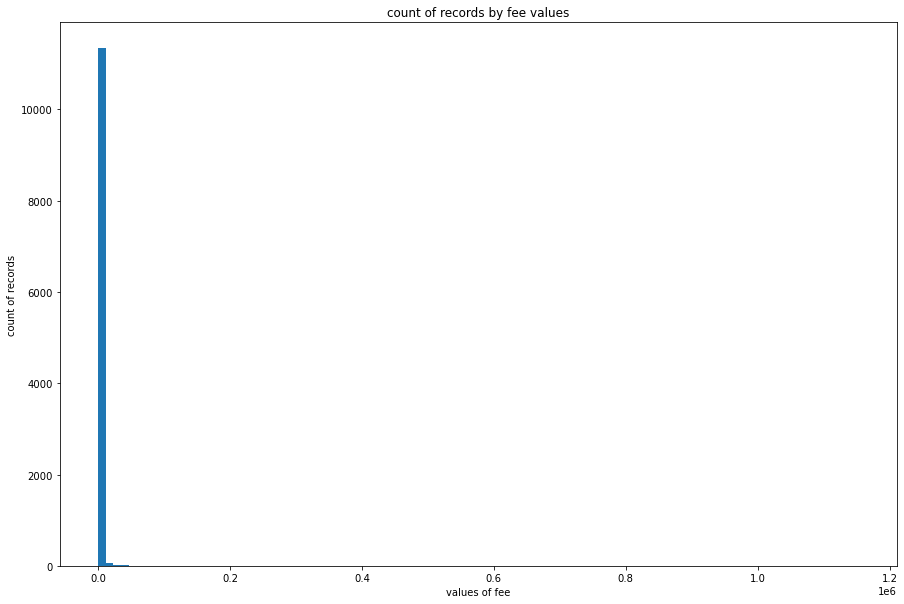

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(trader_position_changes_df["fee"], bins=100)
ax.set_xlabel("values of fee")
ax.set_ylabel("count of records")
ax.set_title("count of records by fee values")
plt.show()

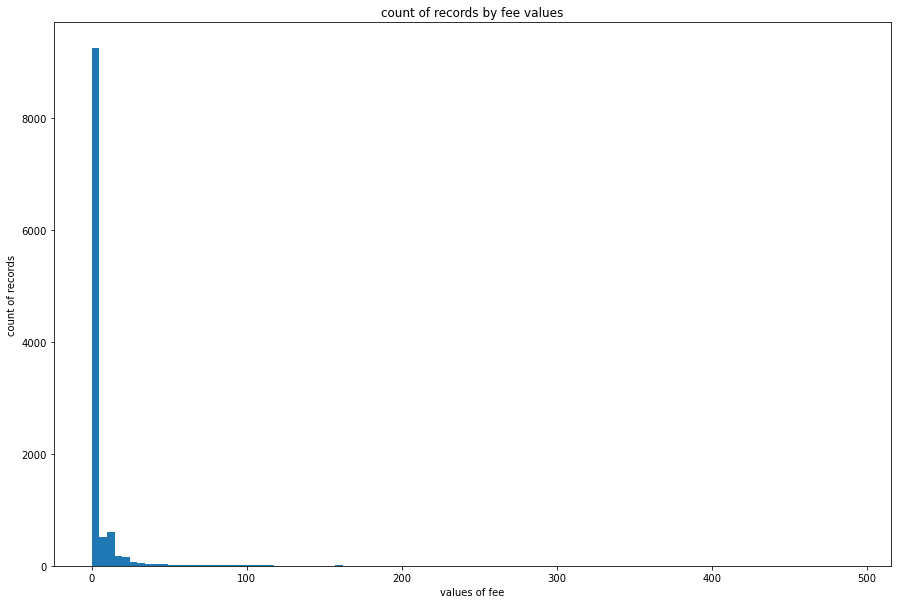

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(trader_position_changes_df[trader_position_changes_df["fee"] < 500]["fee"], bins=100)
ax.set_xlabel("values of fee")
ax.set_ylabel("count of records")
ax.set_title("count of records by fee values")
plt.show()

## Realized Profit and Loss hist

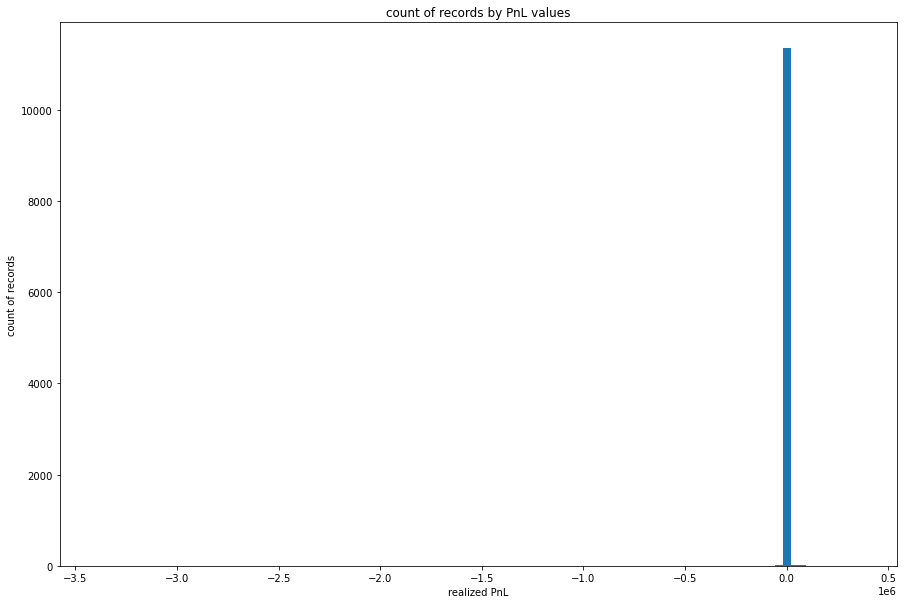

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(trader_position_changes_df["realized_pnl"], bins=100)
ax.set_xlabel("realized PnL")
ax.set_ylabel("count of records")
ax.set_title("count of records by PnL values")
plt.show()

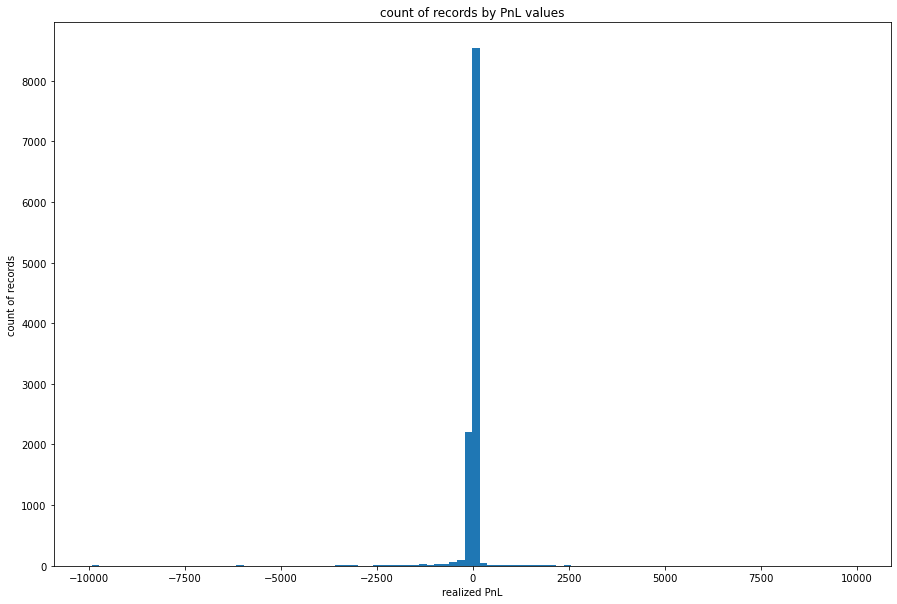

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(trader_position_changes_df[(trader_position_changes_df["realized_pnl"] > -10000) & 
                                   (trader_position_changes_df["realized_pnl"] < 10000)]["realized_pnl"], bins=100)
ax.set_xlabel("realized PnL")
ax.set_ylabel("count of records")
ax.set_title("count of records by PnL values")
plt.show()

# Sum per trader and pool

In [21]:
grouping_columns = ["trader", "pool_name", "exchanged_position_notional", "fee", "realized_pnl"]

trader_pool_position_changes_df = position_changes_df[grouping_columns].groupby(["trader", "pool_name"]).sum()
trader_pool_position_changes_df

exchanged_position_notional  \
trader                                     pool_name                                
0x000000000a38444e0a6e37d3b630d7e855a7cb13 vETH                        -96.334800   
                                           vLUNA                       -28.672741   
0x00004bbaaa33277a699146f220c2edc01ae96501 vATOM                     45817.130583   
                                           vFLOW                     15908.232236   
                                           vFTM                       6955.488616   
...                                                                           ...   
0xffdf4eb71c453bebc5e2672d70c1330164683071 vNEAR                        27.903604   
0xffeb037c74faf4466edd9554d4e281b93ab2ff26 vETH                         -0.500837   
0xffee0f6a4aff3e9644a6bb3239f3fb4ee32482e7 vETH                         -0.875674   
0xfff69ccaffd53e68b056d0e7d24fc941b033eec3 vETH                          0.000000   
0xfffb40347816873ca038756cc87bc610144166b2 vETH                         -0.006217   

                                                             fee  realized_pnl  
trader                                     pool_name                            
0x000000000a38444e0a6e37d3b630d7e855a7cb13 vETH         6.901786     89.433015  
                                           vLUNA        8.024673     20.648068  
0x00004bbaaa33277a699146f220c2edc01ae96501 vATOM      779.224337 -21494.332053  
                                           vFLOW      501.629090 -16409.861326  
                                           vFTM       289.014416  -7244.503032  
...                                                          ...           ...  
0xffdf4eb71c453bebc5e2672d70c1330164683071 vNEAR      102.002098   -129.905702  
0xffeb037c74faf4466edd9554d4e281b93ab2ff26 vETH         0.240381      0.260457  
0xffee0f6a4aff3e9644a6bb3239f3fb4ee32482e7 vETH         7.597076     -6.721402  
0xfff69ccaffd53e68b056d0e7d24fc941b033eec3 vETH         2.598700     -2.598700  
0xfffb40347816873ca038756cc87bc610144166b2 vETH         0.237951     -0.231735  

[14556 rows x 3 columns]

Considering that there are 11 443 records in case of grouping by trader and 14 556 in case of grouping by trader and pool there are 3 113 cases of traders involved in more than one pool

In [25]:
trader_pool_position_changes_df.index[0][1]

'vETH'

# Sum per trader for each pool separately

## BTC

In [51]:
grouping_columns = ["trader", "exchanged_position_notional", "fee", "realized_pnl"]

trader_btc_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vBTC"][grouping_columns].groupby(["trader"]).sum()
trader_btc_position_changes_df.sort_values("realized_pnl")

,exchanged_position_notional,fee,realized_pnl
trader,,,
0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,500690.305995,292294.870797,-642811.481412
0x7c132bde28ad1e0101d45121757d7c6c2e8a550a,107201.114069,764.932190,-107966.046260
0x793dd4db52f8769404aa3093a510d540a8ff1e9b,64516.177843,1104.122793,-65620.300636
0x01995482aad438fa20f783ee599a1871af2563c1,43755.796311,907.437453,-44663.233764
0x27684cfc20021e3783dc1921a5ed31a454e17e02,28689.176810,759.276454,-29448.453264
...,...,...,...
0x25d2415b78bd1d5794934b6b2204b349c1cef7da,-329829.908835,172043.267944,38557.937718
0x8a7cd6f15877a49f91189d311f026eb929228448,-121023.832698,38402.969994,39867.385979
0xa2600926786e9c2e1fa4b4a1118ddf0bfe1e7f91,-53843.380900,12114.288264,41729.092636


In [44]:
print(trader_btc_position_changes_df["realized_pnl"].max())
print(trader_btc_position_changes_df["realized_pnl"].min())
print(trader_btc_position_changes_df["fee"].max())
print(trader_btc_position_changes_df["fee"].min())

69316.19151957802
-642811.4814119124
292294.8707965294
0.0


In [37]:
trader_btc_position_changes_df[trader_btc_position_changes_df["exchanged_position_notional"] == 0].sort_values("realized_pnl")

,exchanged_position_notional,fee,realized_pnl
trader,,,
0xaf4b7b45a36f483c4672bc06ce2eb9c68c660e5a,0.0,30.914167,-30.914167
0x88b0be658e72c5518b37ce0a5625d3fd494dbafa,0.0,30.803818,-30.803818
0x7e8e66e8834f762077deec97f792d83092ebe431,0.0,23.791821,-23.791821
0x707726ebdcfd2a715331dd8d5f195dab6494e89d,0.0,22.819030,-22.819030
0x3d1eaf4c29df809bd6ea82f0e910223940c7be4d,0.0,22.033044,-22.033044
...,...,...,...
0xacf65a171c67a7074ee671240967696ab5d1185f,0.0,0.000000,0.000000
0x6f0fbeb2b5453af0096f270207fc387eb8acd72a,0.0,0.000000,0.000000
0xdbe69ce7103fe9601fb42c04345b5e9c4b2c78f8,0.0,0.000000,0.000000


Out of 2543 records there are 311 positions with sum of exchanged position notional equal to 0, meaning that those positions where liquidated.

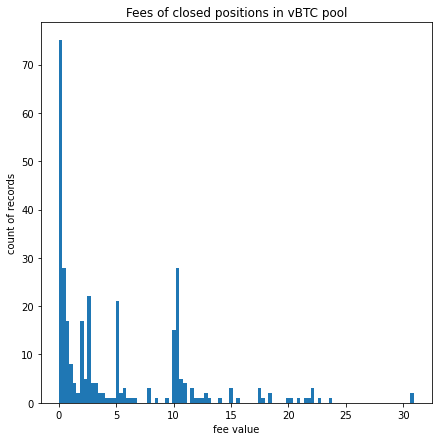

In [41]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.hist(trader_btc_position_changes_df[(trader_btc_position_changes_df["fee"] < 100) &
                                       (trader_btc_position_changes_df["exchanged_position_notional"] == 0)]["fee"], bins=100)
ax.set_xlabel("fee value")
ax.set_ylabel("count of records")
ax.set_title("Fees of closed positions in vBTC pool")
plt.show()

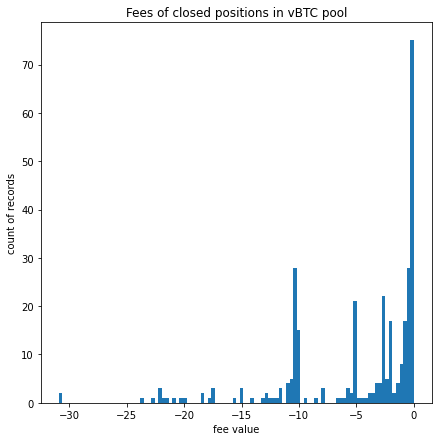

In [40]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.hist(trader_btc_position_changes_df[(trader_btc_position_changes_df["realized_pnl"] < 100) &
                                       (trader_btc_position_changes_df["realized_pnl"] > -100) &
                                       (trader_btc_position_changes_df["exchanged_position_notional"] == 0)]["realized_pnl"], bins=100)
ax.set_xlabel("fee value")
ax.set_ylabel("count of records")
ax.set_title("Fees of closed positions in vBTC pool")
plt.show()

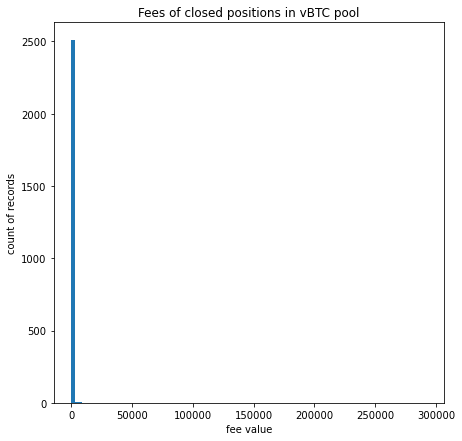

In [48]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.hist(trader_btc_position_changes_df[trader_btc_position_changes_df["fee"] != 0]["fee"], bins=100)
ax.set_xlabel("fee value")
ax.set_ylabel("count of records")
ax.set_title("Fees of closed positions in vBTC pool")
plt.show()

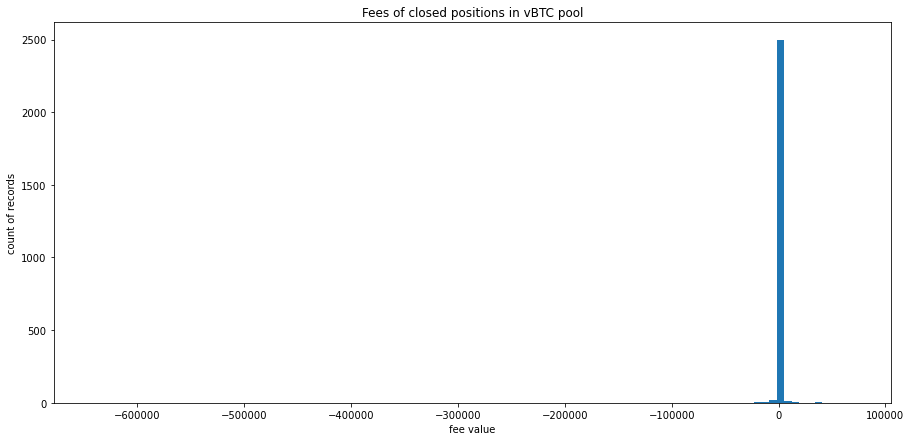

In [50]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.hist(trader_btc_position_changes_df["realized_pnl"], bins=100)
ax.set_xlabel("fee value")
ax.set_ylabel("count of records")
ax.set_title("Fees of closed positions in vBTC pool")
plt.show()

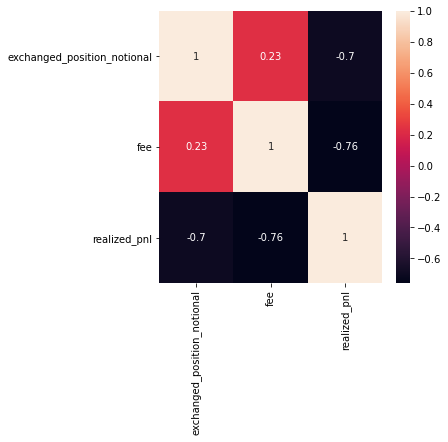

In [69]:
plt.figure(figsize=(5, 5))
sns.heatmap(trader_btc_position_changes_df.corr(), annot=True)
plt.show()

There are much more cases of the losses during performed activity. It is required to check behavior of other pools from the perspective of trading activity.

## ETH

In [52]:
grouping_columns = ["trader", "exchanged_position_notional", "fee", "realized_pnl"]

trader_eth_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vETH"][grouping_columns].groupby(["trader"]).sum()
trader_eth_position_changes_df.sort_values("realized_pnl")

,exchanged_position_notional,fee,realized_pnl
trader,,,
0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2.158253e+05,513277.915788,-983719.628895
0x9455b22685036d89874296460fb28de8a70a6a66,-2.276409e+06,2276.409372,-688397.054486
0x7c132bde28ad1e0101d45121757d7c6c2e8a550a,1.350016e+05,670.645116,-135672.223819
0x914b4e4e4301a421fe1503243f61970c1cc96c4e,8.851683e+04,850.362100,-89367.194568
0xadc8aaddf5dcf81366fcc0212c154dfbfde1ed13,7.056812e+04,1455.925676,-72024.050248
...,...,...,...
0x91d46a68324991f2e96f121317b642a8d4179190,-5.655174e+05,303699.217025,121515.454784
0x8a7cd6f15877a49f91189d311f026eb929228448,-3.819541e+05,77568.260838,127052.806156
0x06b23dc3fb948fd800dcad8a800b60fd0e5401bc,-1.643013e+05,14005.129580,150665.898133


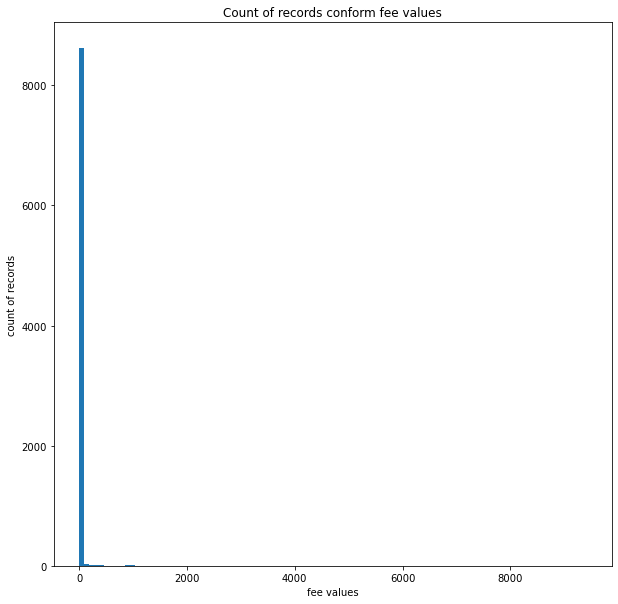

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(trader_eth_position_changes_df[trader_eth_position_changes_df["fee"] < 10000]["fee"], bins=100)
ax.set_xlabel("fee values")
ax.set_ylabel("count of records")
ax.set_title("Count of records conform fee values")
plt.show()

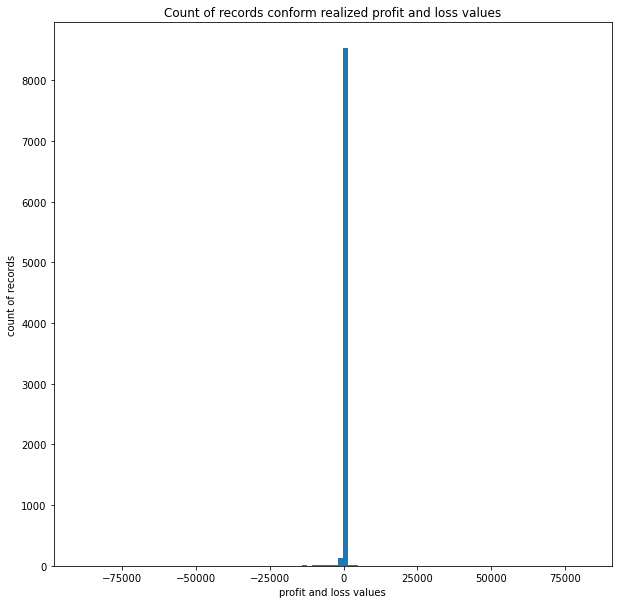

In [57]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(trader_eth_position_changes_df[(trader_eth_position_changes_df["realized_pnl"] < 100000) & 
                                       (trader_eth_position_changes_df["realized_pnl"] > -100000)]["realized_pnl"], bins=100)
ax.set_xlabel("profit and loss values")
ax.set_ylabel("count of records")
ax.set_title("Count of records conform realized profit and loss values")
plt.show()

In [58]:
trader_eth_position_changes_df[trader_eth_position_changes_df["fee"] == 0]

,exchanged_position_notional,fee,realized_pnl
trader,,,
0x12525184cf3114ffddc172905ff9bf10224d8b4e,0.000000,0.0,0.0
0x1441f8c7f6b9e4409b1e325d7e38b99224bdc0dc,-1100.095868,0.0,0.0
0x16e648667b6bb4c7e572f5cf71874f7dd047da8d,0.000000,0.0,0.0
0x23146a7907987ab0bdcebb3a3824072be077ea48,19.272670,0.0,0.0
0x2ed826a087f05431cbc9684e4e6146b8dc8f4b6a,0.000000,0.0,0.0
0x50f1336d61219ec810c624728eb85dfe6fd84683,-653.717752,0.0,0.0
0x5e92a688387d317be3db80258e199094a0c2a462,0.000000,0.0,0.0
0x63959fd3fbb8dda874bfdaba7bfb0b9084c759ff,0.000000,0.0,0.0
0x6548fc1b844dfb45e89783ff5c5c977b8518d65a,-3.977559,0.0,0.0


In [59]:
trader_eth_position_changes_df[(trader_eth_position_changes_df["realized_pnl"] > -1000) &
                               (trader_eth_position_changes_df["realized_pnl"] < 1000)]

,exchanged_position_notional,fee,realized_pnl
trader,,,
0x000000000a38444e0a6e37d3b630d7e855a7cb13,-96.334800,6.901786,89.433015
0x00069a4bf1b2a8d5eded8e91347dbaa70796ff54,0.000000,5.017490,-5.017490
0x000ed00d03833d52ca64312387a0a08e6ef57f76,0.000000,0.228342,-0.228342
0x000f38c11de32df3bfd065c37eec99a00a42546f,-0.000396,0.199900,-0.199504
0x0017f7adf1b404298efa3015ca0b56961fea4c34,45.096774,1.917028,-47.013802
...,...,...,...
0xffdd56a550cd388071a485f9331c46bef652ec28,-120.002147,0.120002,0.000000
0xffeb037c74faf4466edd9554d4e281b93ab2ff26,-0.500837,0.240381,0.260457
0xffee0f6a4aff3e9644a6bb3239f3fb4ee32482e7,-0.875674,7.597076,-6.721402


Conform the observations can be seen that there is a connection between exchanged position notional, fee and realized_pnl. Interesting moment is that in case of taking profit platform will add fee on top and obtained sum will represent exchanged position notional. In the same moment, in case of taking losses there will happen a substraction operation in such a manner that it "balances" the obtained losses.

Another interesting observation is that here repeats the same situation as in case of the Perpetual V1 from the perspective of involved traders. The problem is that most of the traders have in result smaller than 1000 USD of either profits or losses. In this case, most of the trades, collected fees and activity are presented by the small group of traders, which are most likely to perform their activity on biggest pools (as we remember, there is no option of setting positions for more than 5 pools)

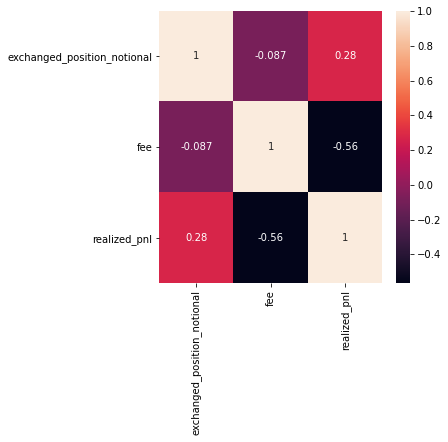

In [70]:
plt.figure(figsize=(5, 5))
sns.heatmap(trader_eth_position_changes_df.corr(), annot=True)
plt.show()

## PERP

In [61]:
perp_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vPERP"]

trader_perp_position_changes_df = perp_position_changes_df[["trader", "exchanged_position_notional", "fee", "realized_pnl"]
                                                      ].groupby("trader").sum()
trader_perp_position_changes_df

,exchanged_position_notional,fee,realized_pnl
trader,,,
0x00ccef1f2c02a986841a6eece88451be8f86958d,137.877107,2.219435,-140.096542
0x037dbeb376900653e8b1744ccfd30f074f9f282a,-0.529226,6.026320,-5.497094
0x041dfc16b24410ec82ebdf9f73a98935a98abb74,101.153745,1.699853,-102.853599
0x053671da56cb9f5c55698244c95fcf1c706a54e7,0.913764,0.000915,0.000000
0x05c4da5cac44f12eef60915cb192effd60321e7e,-4624.424737,658.825824,-4017.224849
...,...,...,...
0xf7dc18956c4b23921402623a1957c669932a7c0f,11.865704,0.987634,-12.853339
0xf87d88cc5ba5d752b32e6fbd1f68e8d683bb8021,-4387.096208,178.512807,8.205170
0xfdc787d4868509ab73121102401372b99dc79d4f,0.043993,0.039524,-0.083517


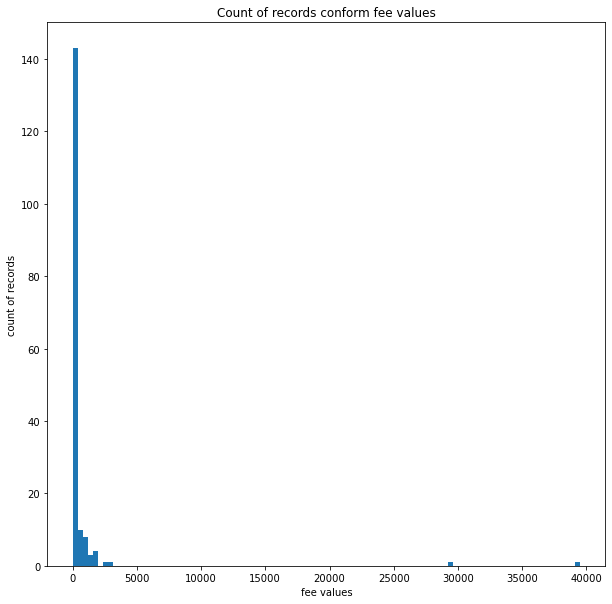

In [62]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(trader_perp_position_changes_df["fee"], bins=100)
ax.set_xlabel("fee values")
ax.set_ylabel("count of records")
ax.set_title("Count of records conform fee values")
plt.show()

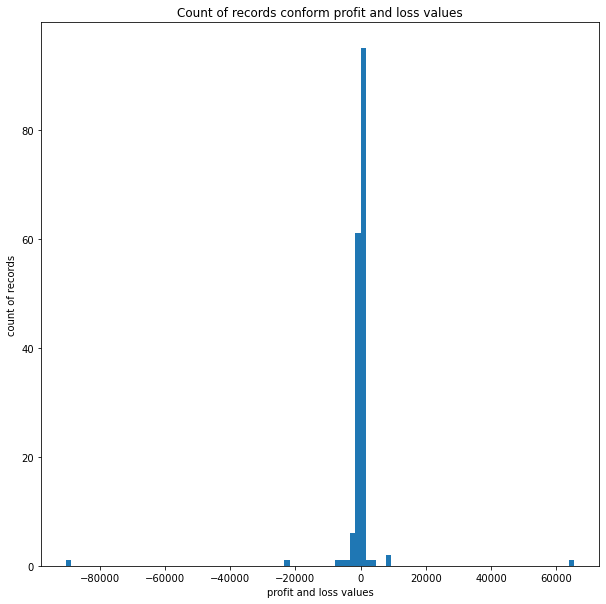

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(trader_perp_position_changes_df["realized_pnl"], bins=100)
ax.set_xlabel("profit and loss values")
ax.set_ylabel("count of records")
ax.set_title("Count of records conform profit and loss values")
plt.show()

In [65]:
trader_perp_position_changes_df[(trader_perp_position_changes_df["realized_pnl"] < 1000) &
                                (trader_perp_position_changes_df["realized_pnl"] > -1000)]

,exchanged_position_notional,fee,realized_pnl
trader,,,
0x00ccef1f2c02a986841a6eece88451be8f86958d,137.877107,2.219435,-140.096542
0x037dbeb376900653e8b1744ccfd30f074f9f282a,-0.529226,6.026320,-5.497094
0x041dfc16b24410ec82ebdf9f73a98935a98abb74,101.153745,1.699853,-102.853599
0x053671da56cb9f5c55698244c95fcf1c706a54e7,0.913764,0.000915,0.000000
0x0827e5665b1db2bed70ceae6f9e94d2996fb06c8,88936.311496,89.025337,0.000000
...,...,...,...
0xf78f2bba5ea14419ff7cb5e68d192cd214ec049e,-9.129556,5.206530,3.923026
0xf7dc18956c4b23921402623a1957c669932a7c0f,11.865704,0.987634,-12.853339
0xf87d88cc5ba5d752b32e6fbd1f68e8d683bb8021,-4387.096208,178.512807,8.205170


In [67]:
trader_perp_position_changes_df[(trader_perp_position_changes_df["realized_pnl"] > 1000)]

,exchanged_position_notional,fee,realized_pnl
trader,,,
0x0cbdd4a3861ba3b2e0f68cea10209a606d38aeca,-40919.819557,39504.117249,65319.884549
0x1dd684c2ba98c08111690259a112ad9dce5fd263,-5651.933177,523.992485,1128.011193
0x706d961ab69d54a0fcbaa13e77842279a5724139,-2385.768404,649.493077,1736.275327
0x8fb5c6f3c336033deeedbb54ad95e96453c9eaa4,-9775.344333,1837.439533,3654.306509
0xc3bfbca84c2737ccdf40916ee4aa033cee19249e,2049.820694,527.964247,1418.399058
0xc9ea06315038afcb52685481909be0a02dd3f206,-27488.701135,1068.204318,7845.346350
0xd94606128b20680539a719b07bca6cbc30786a28,-17772.374554,2916.379159,7952.248968


The first place conform trades is taken by trader with address 0x0cbdd4a3861ba3b2e0f68cea10209a606d38aeca, activity of which on the optimism network demonstrates high rate of operations, big values of tokens exchanged and most likely bot behavior because of the principle staying behind transactions (they are very similar, small time windows, USD operations mostly)

Idea behind fee and realized_pnl is not supported in the current case

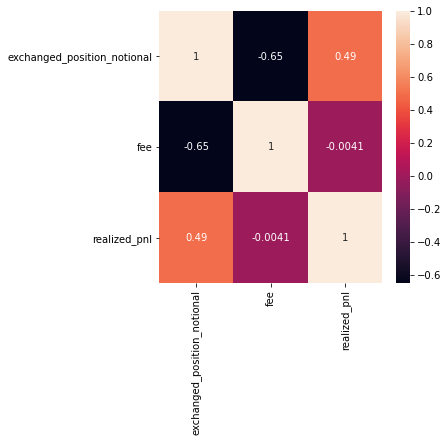

In [71]:
plt.figure(figsize=(5, 5))
sns.heatmap(trader_perp_position_changes_df.corr(), annot=True)
plt.show()

## Check of the open notional theory about changes

In [72]:
btc_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vBTC"]

trader_open_notional_df = btc_position_changes_df[["open_notional", "trader"]].groupby("trader").mean()
trader_btc_position_changes_df["open_notional"] = trader_open_notional_df["open_notional"]

In [73]:
trader_btc_position_changes_df

,exchanged_position_notional,fee,realized_pnl,open_notional
trader,,,,
0x000872be5ec7dc8197ef6618ef507d9a449cac1a,-6.549313e-02,0.227951,-0.162458,-57.000000
0x00189ff48605528b577e7794b1f3ba0888888888,7.377747e+00,0.690059,-8.067806,-87.223200
0x00695c7fcd8ee1517adb85c24547fc792613a5c5,1.137303e+01,19.978627,-31.351652,-5000.000000
0x00a99f4bf5d465f303b6bb8cb53f5ca5e6046ba8,6.989987e+01,1.149371,-71.049237,-304.970202
0x0112bef73098ca5cb9d62fdd35bea9cd778a40f1,1.421085e-14,0.215892,-0.215892,-54.000000
...,...,...,...,...
0xff5ae7f6be86dec4972e39d548dfbb241142bd93,6.394885e-14,0.302562,-0.302562,-37.839134
0xff646b759b2a0164b6e9937baa0a34ce90cc288e,2.842171e-14,0.199900,-0.199900,-50.000000
0xff65fe4f30af41af4e02772f4707f32a83491530,-2.052352e-02,0.020011,0.000513,-5.000000


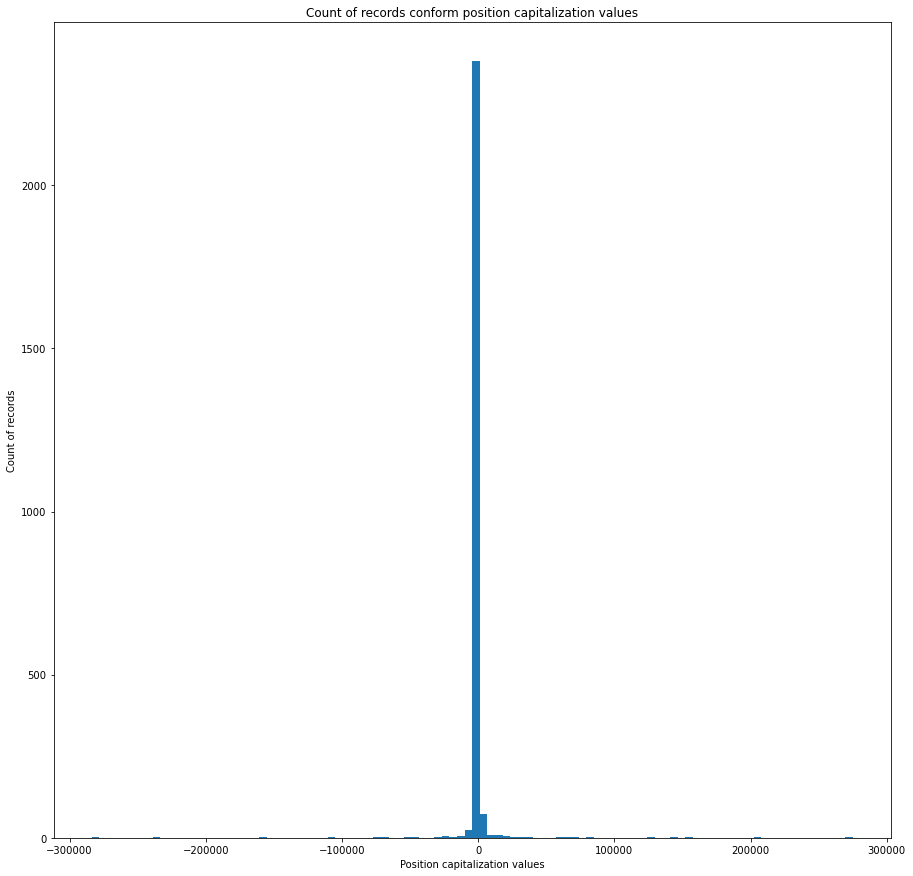

In [76]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.hist(trader_btc_position_changes_df["open_notional"], bins=100)
ax.set_xlabel("Position capitalization values")
ax.set_ylabel("Count of records")
ax.set_title("Count of records conform position capitalization values")
plt.show()

In [77]:
eth_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vETH"]

trader_open_notional_df = eth_position_changes_df[["open_notional", "trader"]].groupby("trader").mean()
trader_eth_position_changes_df["open_notional"] = trader_open_notional_df["open_notional"]

In [78]:
trader_eth_position_changes_df

,exchanged_position_notional,fee,realized_pnl,open_notional
trader,,,,
0x000000000a38444e0a6e37d3b630d7e855a7cb13,-96.334800,6.901786,89.433015,-1224.429170
0x00069a4bf1b2a8d5eded8e91347dbaa70796ff54,0.000000,5.017490,-5.017490,-1255.000000
0x000ed00d03833d52ca64312387a0a08e6ef57f76,0.000000,0.228342,-0.228342,57.000000
0x000f38c11de32df3bfd065c37eec99a00a42546f,-0.000396,0.199900,-0.199504,-50.000000
0x0017f7adf1b404298efa3015ca0b56961fea4c34,45.096774,1.917028,-47.013802,-360.517772
...,...,...,...,...
0xffdd56a550cd388071a485f9331c46bef652ec28,-120.002147,0.120002,0.000000,119.882145
0xffeb037c74faf4466edd9554d4e281b93ab2ff26,-0.500837,0.240381,0.260457,-60.000000
0xffee0f6a4aff3e9644a6bb3239f3fb4ee32482e7,-0.875674,7.597076,-6.721402,-950.000000


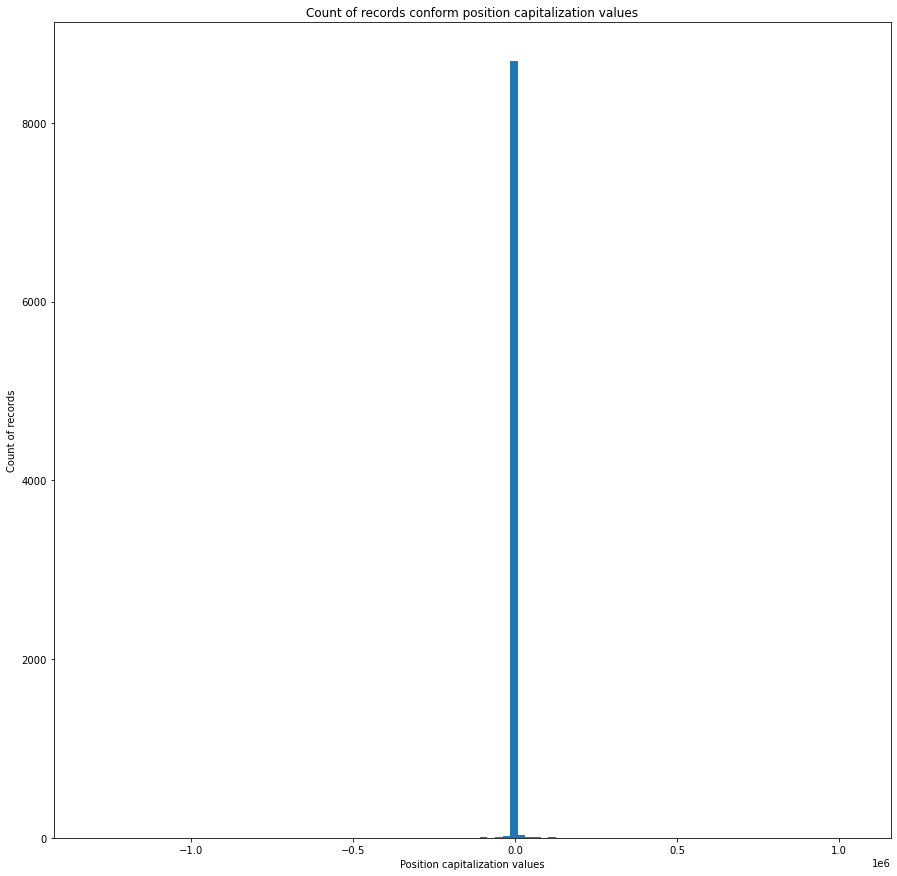

In [79]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.hist(trader_eth_position_changes_df["open_notional"], bins=100)
ax.set_xlabel("Position capitalization values")
ax.set_ylabel("Count of records")
ax.set_title("Count of records conform position capitalization values")
plt.show()